In [20]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import math
import seaborn as sns
os.getcwd()
df = pd.read_csv("fraud test.csv")
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])

C:\Users\Ximena\AppData\Local\Temp\ipykernel_4852\403742540.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])


In [21]:
df.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,2020-10-02 01:53:55.673389056,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
min,0.000000,2020-06-21 12:14:00,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,2020-08-09 06:10:00,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,2020-10-03 00:59:00,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,2020-12-01 03:02:30,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,2020-12-31 23:59:00,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000
std,160422.401459,NaN,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008


In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Text(0.5, 1.0, 'Faltantes de la base de datos')

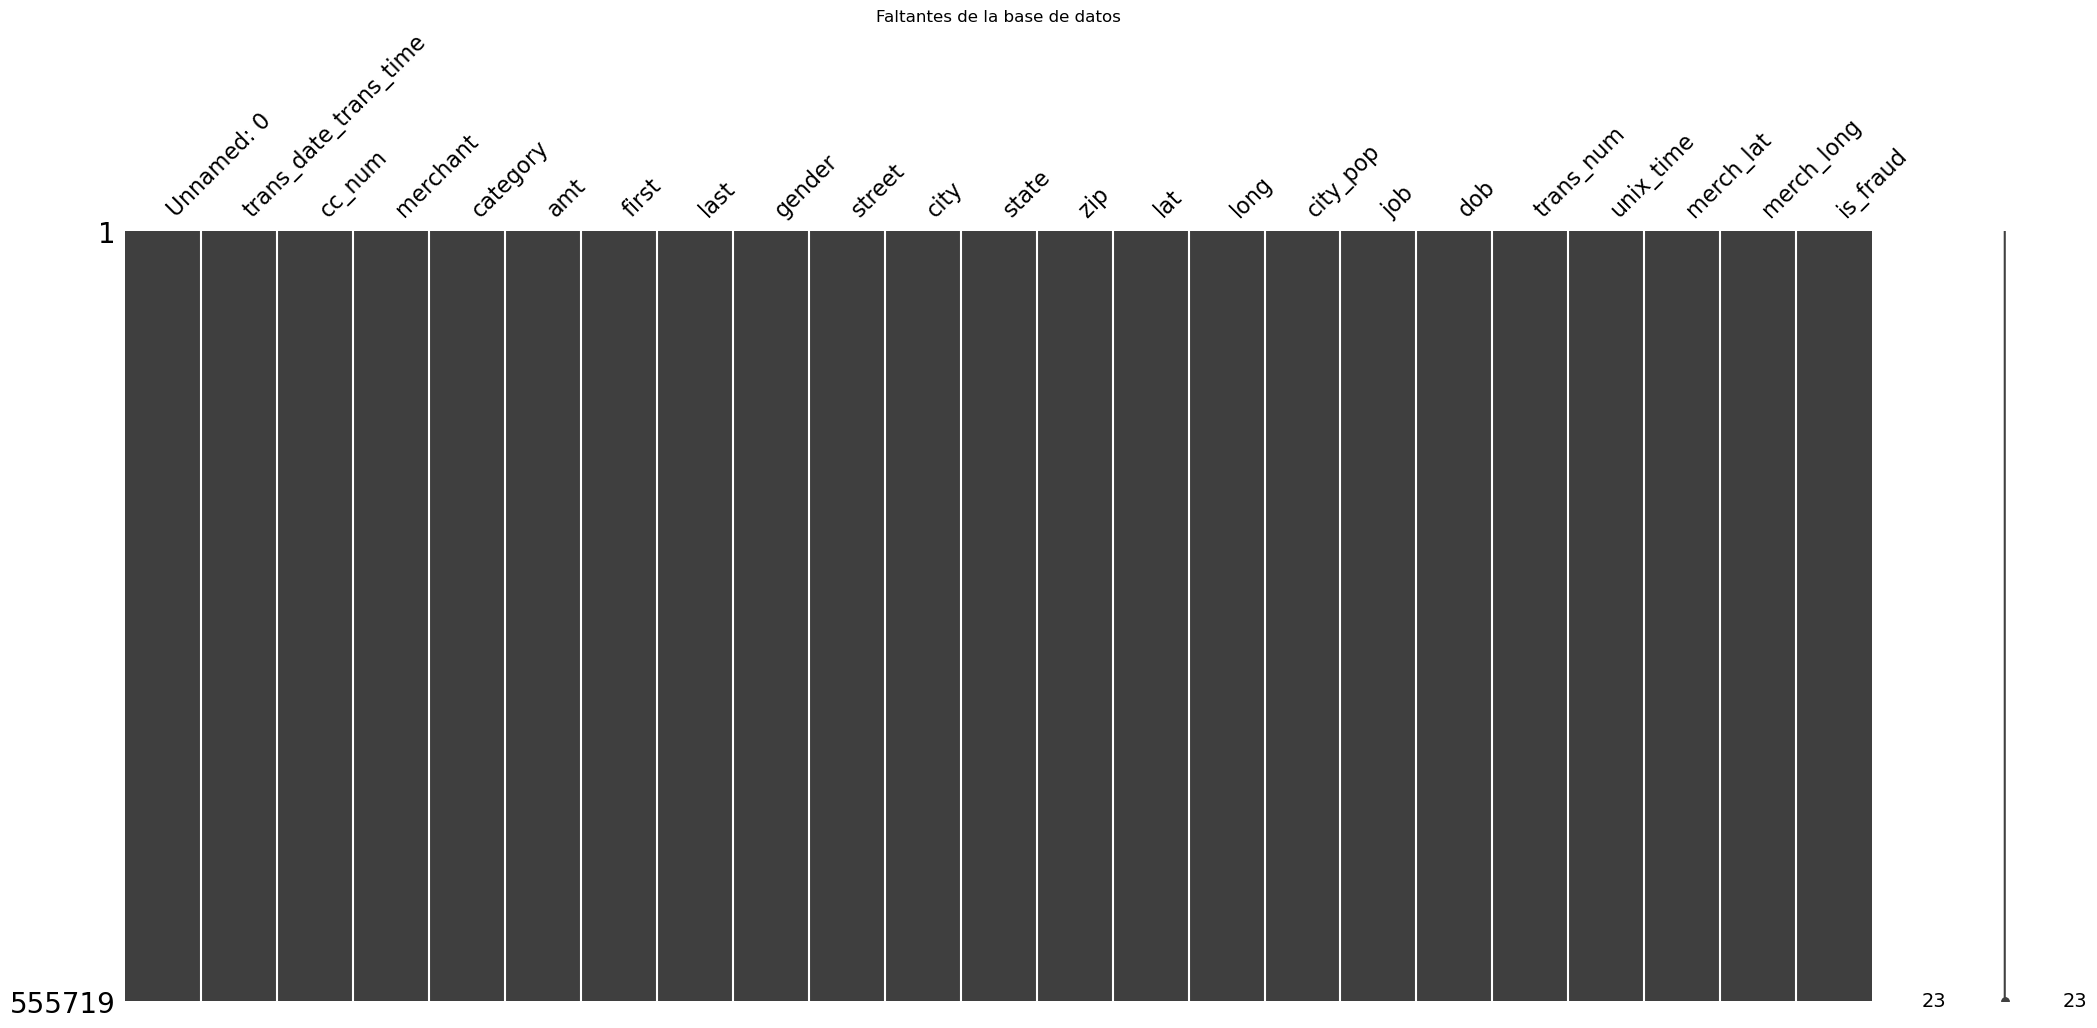

In [4]:
import missingno as msno
#Analizamos los datos faltantes de forma gráfica
msno.matrix(df)
plt.title('Faltantes de la base de datos')

In [23]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [27]:
data = df[['merchant','category','amt','gender','street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud']]

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_dataframe(df, min_freq=0.05):
    # Separar las variables numéricas y categóricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Gráficos de variables numéricas (histogramas)
    if len(numeric_cols) > 0:
        num_rows = int(np.ceil(np.sqrt(len(numeric_cols))))
        num_cols = int(np.ceil(len(numeric_cols) / num_rows))
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
        fig.suptitle('Histogramas de Variables Numéricas', fontsize=16)
        axes = axes.flatten()
        
        for i, col in enumerate(numeric_cols):
            axes[i].hist(df[col].dropna(), bins=15, color='slategray', edgecolor='grey')
            axes[i].set_title(col, fontsize=12)
            axes[i].set_xlabel('Valor', fontsize=10)
            axes[i].set_ylabel('Frecuencia', fontsize=10)
        
        for i in range(len(numeric_cols), len(axes)):
            fig.delaxes(axes[i])  # Eliminar ejes no usados
            
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    # Gráficos de variables categóricas (gráficos de pie en una cuadrícula de 2 columnas)
    if len(categorical_cols) > 0:
        num_rows = int(np.ceil(len(categorical_cols) / 2))
        fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
        fig.suptitle('Gráficos de Variables Categóricas (80% o Más)', fontsize=16)
        axes = axes.flatten()

        for i, col in enumerate(categorical_cols):
            data = df[col].value_counts(normalize=True)  # Calcular proporciones
            data = data[data >= min_freq]  # Filtrar categorías con frecuencia mínima
            data_80 = data[data.cumsum() <= 0.8]  # Filtrar categorías que sumen hasta el 80%
            if data_80.sum() < 0.8:  # Incluir categoría "Otros" si es necesario
                data_80["Otros"] = 1 - data_80.sum()
            
            # Crear gráfico de pie en el eje correspondiente
            axes[i].pie(data_80, labels=data_80.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
            axes[i].set_title(col, fontsize=12)
        
        # Eliminar ejes no usados
        for i in range(len(categorical_cols), len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


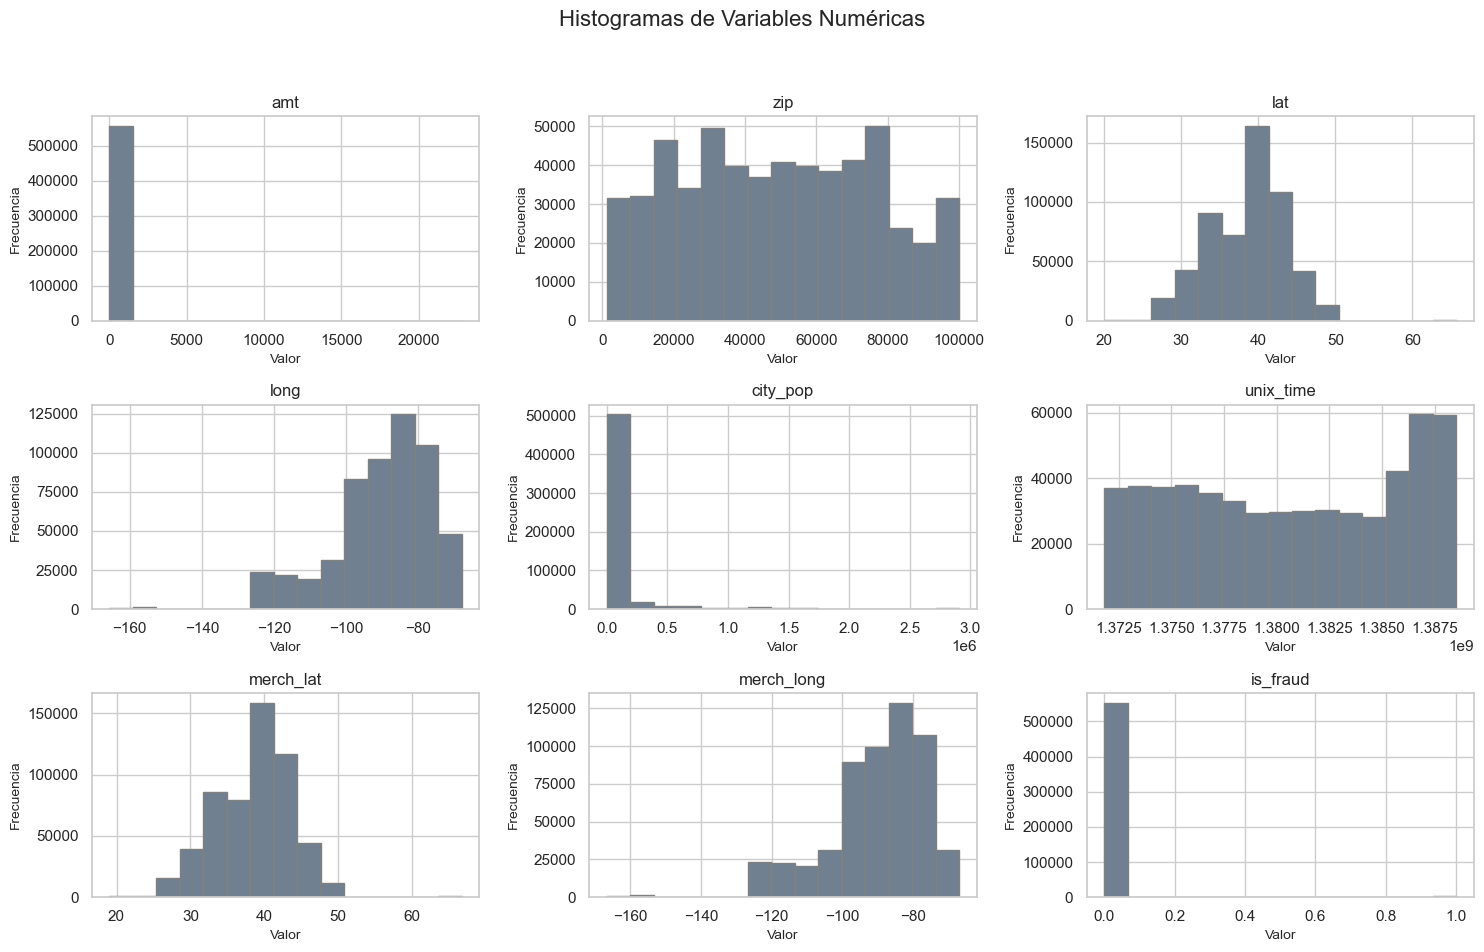

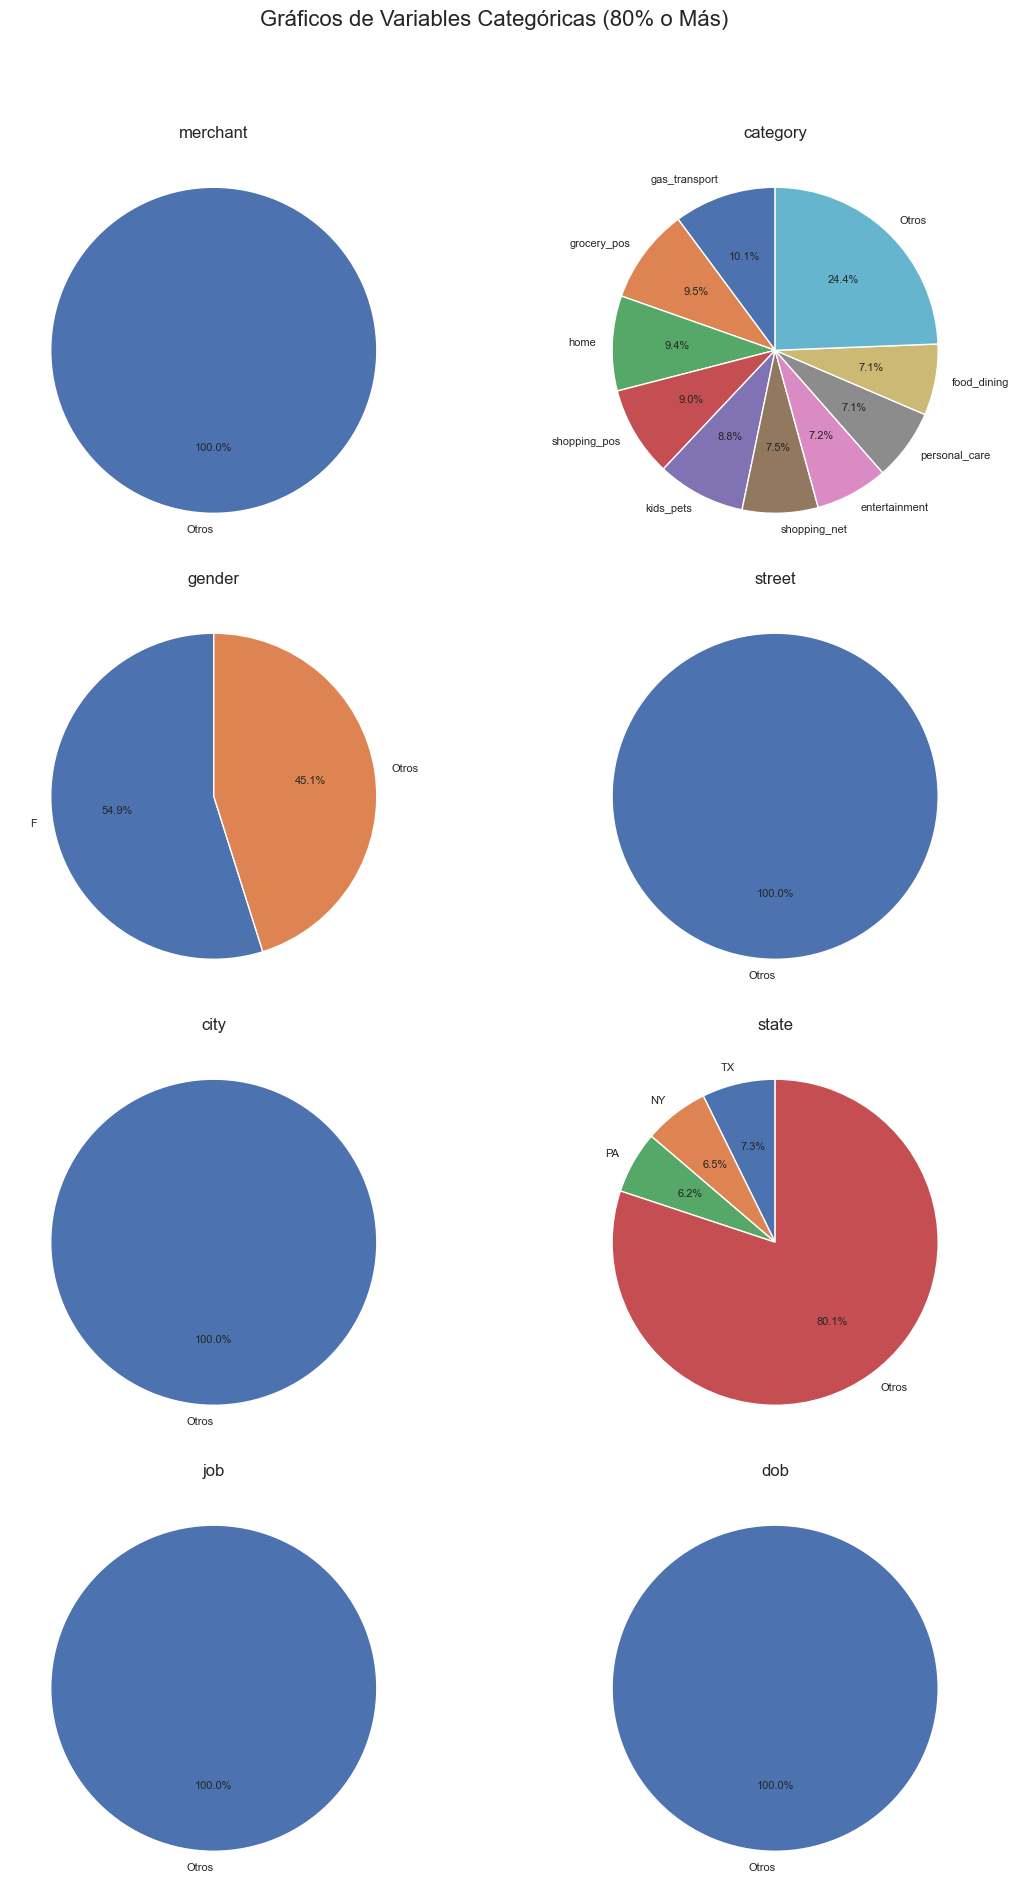

In [57]:
plot_dataframe(data)